In [1]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential,Model
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
import math

Using TensorFlow backend.


In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

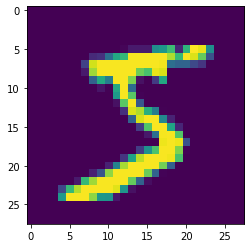

In [3]:
plt.imshow(X_train[0])
plt.show()

In [4]:
X_train = (X_train.astype('float32') - 127.5)/127.5
X_train = X_train.reshape((-1,784))
print(np.min(X_train))
print(np.max(X_train))

-1.0
1.0


In [5]:
Total_epochs = 50
batch_size = 256
no_of_batches = int(X_train.shape[0]/batch_size)
half_batch_size = 128
noise_dim = 100
adam = Adam(lr=2e-4,beta_1=0.5) 

In [6]:
generator_model = Sequential()
generator_model.add(Dense(256,input_shape=(noise_dim,)))
generator_model.add(LeakyReLU(0.2))

generator_model.add(Dense(512))
generator_model.add(LeakyReLU(0.2))

generator_model.add(Dense(1024))
generator_model.add(LeakyReLU(0.2))

generator_model.add(Dense(784,activation='tanh'))

generator_model.summary()

generator_model.compile(loss='binary_crossentropy',optimizer=adam)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)              

In [7]:
discriminator_model = Sequential()
discriminator_model.add(Dense(512,input_shape=(784,)))
discriminator_model.add(LeakyReLU(0.2))

discriminator_model.add(Dense(256))
discriminator_model.add(LeakyReLU(0.2))

discriminator_model.add(Dense(1,activation='sigmoid'))

discriminator_model.summary()
discriminator_model.compile(loss='binary_crossentropy',optimizer=adam)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [8]:
discriminator_model.trainable = False
gan_input = Input(shape=(noise_dim,))
gan_image = generator_model(gan_input)
gan_output = discriminator_model(gan_image)

In [9]:
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

In [10]:
def saveImages(epoch,samples=100):
    noise = np.random.normal(0,1,size=(samples,noise_dim))
    gen_images = generator_model.predict(noise)
    gen_images = gen_images.reshape(samples,28,28)
    
    plt.figure(figsize = (10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(gen_images[i],interpolation='nearest',cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('images/gen_image_output{}.png'.format(epoch))
    plt.show()

C:\Users\jgoel\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1 D loss: 153.691801 G loss: 223.979540
Epoch 2 D loss: 146.113019 G loss: 248.344853
Epoch 3 D loss: 148.304364 G loss: 259.878838
Epoch 4 D loss: 147.368707 G loss: 269.828068
Epoch 5 D loss: 140.607115 G loss: 288.369621
Epoch 6 D loss: 134.526814 G loss: 308.280381
Epoch 7 D loss: 131.901817 G loss: 310.806839
Epoch 8 D loss: 135.326901 G loss: 302.535068
Epoch 9 D loss: 136.948892 G loss: 290.515641
Epoch 10 D loss: 139.624504 G loss: 274.931999


C:\Users\jgoel\Anaconda3\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


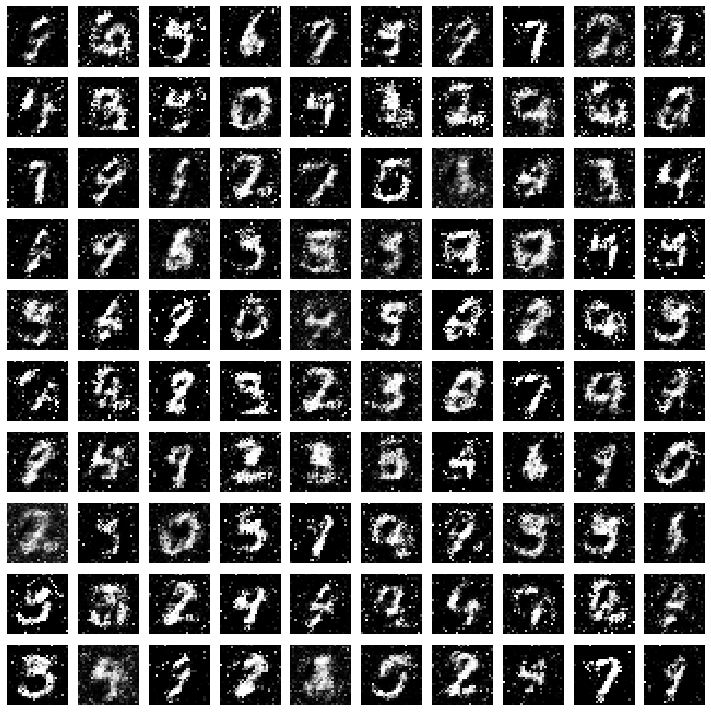

Epoch 11 D loss: 143.264919 G loss: 269.498781
Epoch 12 D loss: 148.008097 G loss: 252.174349
Epoch 13 D loss: 149.666934 G loss: 243.077760
Epoch 14 D loss: 148.958835 G loss: 244.726655
Epoch 15 D loss: 150.032418 G loss: 240.974405
Epoch 16 D loss: 149.100817 G loss: 244.184229
Epoch 17 D loss: 150.524459 G loss: 244.150086
Epoch 18 D loss: 151.070788 G loss: 241.340927
Epoch 19 D loss: 150.614575 G loss: 242.441672
Epoch 20 D loss: 151.532955 G loss: 241.683642


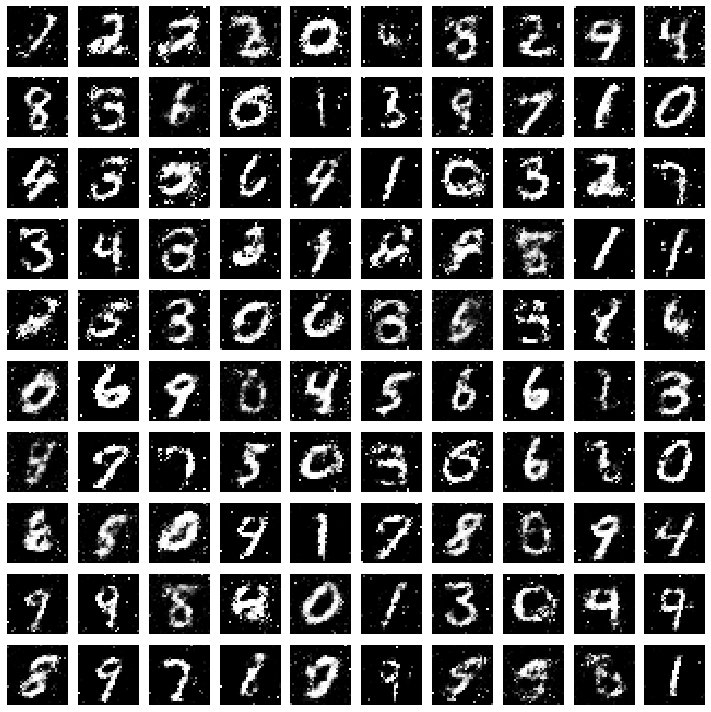

Epoch 21 D loss: 152.570669 G loss: 238.109765
Epoch 22 D loss: 153.108664 G loss: 236.086400
Epoch 23 D loss: 153.886894 G loss: 235.509475
Epoch 24 D loss: 153.549806 G loss: 237.238549
Epoch 25 D loss: 154.015176 G loss: 233.862059
Epoch 26 D loss: 154.343544 G loss: 233.919280
Epoch 27 D loss: 154.608845 G loss: 232.360513


In [ ]:
d_loss_list = []
g_loss_list = []
for epoch in range(1,Total_epochs+1):
    epoch_d_loss = 0.0
    epoch_g_loss = 0.0
    for step in range(no_of_batches):
        idx = np.random.randint(0,X_train.shape[0],half_batch_size)
        real_images = X_train[idx]
        
        noise = np.random.normal(0,1,size=(half_batch_size,noise_dim))
        fake_images = generator_model.predict(noise)
        
        real_y = np.ones((half_batch_size,1)) * 0.9
        fake_y = np.zeros((half_batch_size,1))
        
        d_loss_real = discriminator_model.train_on_batch(real_images,real_y)
        d_loss_fake = discriminator_model.train_on_batch(fake_images,fake_y)
        
        d_loss = (d_loss_fake+d_loss_real)/2.0 
        d_loss_list.append(d_loss)
        epoch_d_loss += d_loss
        
        #Train Generator in which Discriminator is frozen
        noise_ground = np.random.normal(0,1,size=(batch_size,noise_dim))
        ground_truth_y = np.ones((batch_size,1))
        g_loss = model.train_on_batch(noise_ground,ground_truth_y)
        g_loss_list.append(g_loss)
        epoch_g_loss += g_loss
    print("Epoch %d D loss: %f G loss: %f" % ((epoch), epoch_d_loss, epoch_g_loss))
    if epoch%10==0:
        generator_model.save("model/generator{}.h5".format(epoch))
        saveImages(epoch)

In [ ]:
plt.plot(g_loss_list,label="Generator Loss")
plt.plot(d_loss_list,label="Discriminator Loss")
plt.title("Loss")
plt.legend()
plt.show()